In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
data1 = pd.read_csv('./Data/data+column_relation.csv')
df=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [3]:

RF=RandomForestClassifier( random_state=42)
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [4]:
GB=GradientBoostingClassifier( random_state=42)
GB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [5]:
GBscore = GB.score(x_test, y_test)
RFscore = RF.score(x_test, y_test)
total_val_acc = RFscore + GBscore 
w1 = RFscore / total_val_acc
w2 = GBscore / total_val_acc

In [6]:
ensemble = VotingClassifier(estimators=[('RF', RF), ('GB', GB)], voting='soft',weights=[w1,w2])
ensemble.fit(x_train, y_train)


VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=42)),
                             ('GB',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft',
                 weights=[0.5103443965247828, 0.48965560347521725])


Training Accuracy score: 0.9577233965723174
Testing Accuracy score: 0.8940117764692812
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4501
           1       0.88      0.91      0.90      4500

    accuracy                           0.89      9001
   macro avg       0.89      0.89      0.89      9001
weighted avg       0.89      0.89      0.89      9001



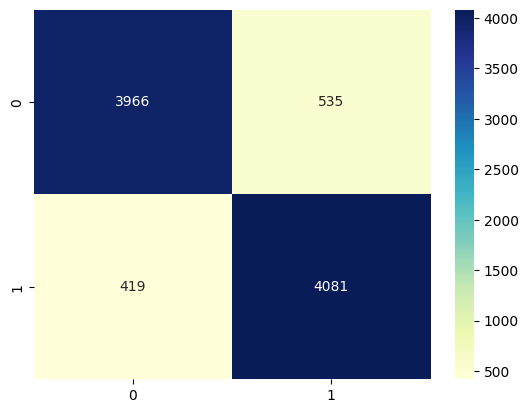

In [7]:
from sklearn.metrics import accuracy_score
import seaborn as sns
y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

cross validation

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
df=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]

x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf=VotingClassifier(estimators=[('RF', RF), ('GB', GB)], voting='soft',weights=[w1,w2])
scores = cross_val_score(clf, x, y, cv = k_folds)
print("Average CV Score: ", scores.mean())
# Average CV Score:  0.8290094003801626 / 0.89

Average CV Score:  0.8290094003801626
